<a href="https://colab.research.google.com/github/Shreygupta2002/Digit-Recognizer/blob/main/code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognizer**

In this Competition we have to make a computer vision model to predict the digit represented in the image of a hand.
Kaggle Competition Link- https://www.kaggle.com/c/digit-recognizer 

**Importing Libraries and Frameworks**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Training Data**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')
df.isnull().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

**Preparing the Training Set**

In [4]:
X=df.drop(columns=['label'])
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X.isnull().sum().sum()

0

In [7]:
y=df['label']

**Splitting into Training and Test Set**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [9]:
X_train.isnull().sum().sum()

0

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
X_train=X_train.to_numpy()


In [12]:
X_train.shape

(37800, 784)

**Defining The Model**

In [13]:
def get_model():
    model = keras.Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), activation='elu', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(BatchNormalization())

    model.add(Conv2D(25, kernel_size=(3, 3), activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(BatchNormalization())

    model.add(Conv2D(30, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(1000, activation='relu'))
    model.add(keras.layers.Dropout(0.40))
    model.add(BatchNormalization())

    model.add(Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.45))
    model.add(BatchNormalization())

    model.add(Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    return model

In [14]:
model =get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 25)        3625      
                                                        

In [15]:
model.compile(optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
with tf.device('/GPU:0'):
  history = model.fit(X_train.reshape(-1,28,28,1),y_train ,epochs=50)

Epoch 1/50
1182/1182 [==============================] - 22s 11ms/step - loss: 0.2779 - accuracy: 0.9149
Epoch 2/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.1123 - accuracy: 0.9665
Epoch 3/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.0891 - accuracy: 0.9735
Epoch 4/50
1182/1182 [==============================] - 12s 11ms/step - loss: 0.0750 - accuracy: 0.9785
Epoch 5/50
1182/1182 [==============================] - 12s 11ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 6/50
1182/1182 [==============================] - 12s 11ms/step - loss: 0.0581 - accuracy: 0.9832
Epoch 7/50
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0558 - accuracy: 0.9832
Epoch 8/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.0476 - accuracy: 0.9854
Epoch 9/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.0416 - accuracy: 0.9875
Epoch 10/50
1182/1182 [==============================] - 13s 11m

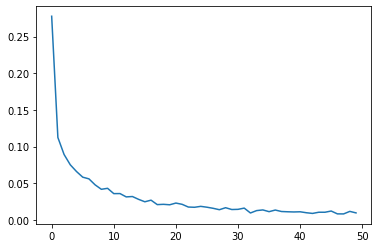

In [17]:
plt.plot(history.history['loss'])

**Evaluating the Test Set**

In [18]:
X_test=X_test.to_numpy()

In [19]:
model.evaluate(X_test.reshape(-1,28,28,1),y_test)

132/132 [==============================] - 1s 5ms/step - loss: 0.0520 - accuracy: 0.9890


[0.05199745297431946, 0.989047646522522]

**Making Submission**

In [20]:
df_test=pd.read_csv('/content/drive/Othercomputers/My Laptop/Machine Learning/Digit Recognizer/test.csv')

In [21]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test=df_test/255.0

In [23]:
df_test=df_test.to_numpy()

In [24]:
df_test.shape

(28000, 784)

In [25]:
y_pred=model.predict(df_test.reshape(-1,28,28,1))

In [26]:
y_pred

array([[6.7187688e-12, 2.7878790e-09, 1.0000000e+00, ..., 1.7668862e-09,
        6.0184316e-11, 1.0649176e-10],
       [9.9999356e-01, 8.9260749e-07, 2.3504127e-07, ..., 9.5263502e-08,
        3.6605962e-07, 7.7382936e-09],
       [5.8571920e-10, 3.4320170e-12, 1.6187039e-09, ..., 2.2867594e-10,
        2.0514640e-11, 1.0000000e+00],
       ...,
       [1.4938377e-10, 3.2665619e-12, 6.9863636e-11, ..., 8.1007832e-11,
        4.2854064e-11, 3.2531475e-10],
       [3.2900332e-10, 1.2047106e-11, 2.3301722e-10, ..., 4.5190224e-10,
        3.9551034e-13, 1.0000000e+00],
       [3.5733699e-13, 7.0191152e-11, 1.0000000e+00, ..., 7.8059927e-11,
        3.0628059e-11, 1.1424848e-11]], dtype=float32)

In [27]:
y_predicted_labels=[np.argmax(i) for i in y_pred]

In [28]:
y_predicted_labels[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [29]:
submit=pd.DataFrame(data=y_predicted_labels, columns=['Label'])

In [30]:
submit.head()

,Label
0,2
1,0
2,9
3,9
4,3


In [31]:
submit['ImageId']=submit.index+1

In [32]:
submit.to_csv('/content/drive/Othercomputers/My Laptop/Machine Learning/Digit Recognizer/submit.csv')